In [1]:
# Import dependencies.

import json
import pandas as pd
import numpy as np
import sklearn as skl
import numpy
import datetime
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

# From dependency imports
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score,r2_score
from sklearn.linear_model import LogisticRegression
from sqlalchemy import create_engine
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


C:\Users\dcohen\.conda\envs\PythonData\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\dcohen\.conda\envs\PythonData\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\dcohen\.conda\envs\PythonData\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\dcohen\.conda\envs\PythonData\lib\site-packages\tensorf

In [2]:
### Configure settings for Relational Database Service, and defining database info in config variable.
jdbc_url="jdbc:postgresql://34.67.52.115/team5k"
config = {'user': 'postgres', 
          "password": "team5kteam5k", 
          "driver":"org.postgresql.Driver",
          "location": "34.67.52.115",
          "db": "team5k",
          "port": "5432"}

In [3]:
### Flag to print Informational message
dmdebug=True

### Creating variable holding postgres info in format "postgres://[user]:[password]@[location]:[port]/[database]".
create_engine_str = ('postgresql://' 
                     + config["user"] 
                     + ":" + config["password"] 
                     + "@" + config["location"] 
                     + ":" + config["port"] 
                     + "/" + config["db"])

In [4]:
# Connecting to Postgres instance.
engine = create_engine(create_engine_str)

In [5]:
# Printing info for table names. 
print (engine.table_names())

['committees', 'candidates', 'education', 'committee_summary_2020', 'six_state_donations', 'donations', 'fec_donor_az', 'health_metrics', 'birth_death_rate', 'postal_codes', 'fec_donor_mi', 'fec_donor_wi', 'fec_committee', 'fec_donor_pa', 'agg_county_votes', 'agg_county_donors', 'pres_votes_6t', 'unemployment', 'fec_donor_nc', 'fec_donor_fl']


In [6]:
### Get voter data
votes_df = pd.read_sql_query('select * from "agg_county_votes"',con=engine)
votes_df

,index,blue_votes,red_votes,other_votes,total_votes,county,state,election_year,PopPct_Urban,Unemployment,PopDen_Urban,PopPct_Rural,PopDen_Rural,winning_party
0,0,13025,5947,484,19456,Apache,AZ,2000,25.94,9.0,1080.7,74.06,4.7,democrat
1,0,13360,18180,1701,33241,Cochise,AZ,2000,63.70,4.5,1933.4,36.30,7.8,republican
2,0,20280,17562,3041,40883,Coconino,AZ,2000,68.53,4.4,1939.8,31.47,2.3,democrat
3,0,7700,9158,878,17736,Gila,AZ,2000,58.94,5.2,1625.0,41.06,4.6,republican
4,0,3355,6007,302,9664,Graham,AZ,2000,53.56,5.4,1430.2,46.44,3.8,republican
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,0,10845,13213,594,24652,Tuscola,MI,2000,15.84,4.7,1333.3,84.16,58.9,republican
94,0,13796,14792,894,29482,Van Buren,MI,2000,29.14,4.1,1030.5,70.86,92.2,republican
95,0,86647,52459,5834,144940,Washtenaw,MI,2000,83.55,2.4,2131.4,16.45,99.3,democrat
96,0,530414,223021,15192,768627,Wayne,MI,2000,99.30,3.9,3301.7,0.70,196.3,democrat


In [7]:
# Look at column info
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(votes_df.dtypes)

index              int64
blue_votes         int64
red_votes          int64
other_votes        int64
total_votes        int64
county            object
state             object
election_year      int64
PopPct_Urban     float64
Unemployment     float64
PopDen_Urban     float64
PopPct_Rural     float64
PopDen_Rural     float64
winning_party     object
dtype: object


In [8]:
# Description of the Aggregate Votes dataset
votes_df.describe

<bound method NDFrame.describe of     index  blue_votes  red_votes  other_votes  total_votes     county state  \
0       0       13025       5947          484        19456     Apache    AZ   
1       0       13360      18180         1701        33241    Cochise    AZ   
2       0       20280      17562         3041        40883   Coconino    AZ   
3       0        7700       9158          878        17736       Gila    AZ   
4       0        3355       6007          302         9664     Graham    AZ   
..    ...         ...        ...          ...          ...        ...   ...   
93      0       10845      13213          594        24652    Tuscola    MI   
94      0       13796      14792          894        29482  Van Buren    MI   
95      0       86647      52459         5834       144940  Washtenaw    MI   
96      0      530414     223021        15192       768627      Wayne    MI   
97      0        5326       7215          441        12982    Wexford    MI   

    election_year

In [9]:
# Index of column names in the Aggregate Votes dataset
votes_df.columns

Index(['index', 'blue_votes', 'red_votes', 'other_votes', 'total_votes',
       'county', 'state', 'election_year', 'PopPct_Urban', 'Unemployment',
       'PopDen_Urban', 'PopPct_Rural', 'PopDen_Rural', 'winning_party'],
      dtype='object')

In [10]:
# Find null values in these data
for column in votes_df.columns:
    print(f"Column {column} has {votes_df[column].isnull().sum()} null values")

Column index has 0 null values
Column blue_votes has 0 null values
Column red_votes has 0 null values
Column other_votes has 0 null values
Column total_votes has 0 null values
Column county has 0 null values
Column state has 0 null values
Column election_year has 0 null values
Column PopPct_Urban has 0 null values
Column Unemployment has 0 null values
Column PopDen_Urban has 12 null values
Column PopPct_Rural has 0 null values
Column PopDen_Rural has 0 null values
Column winning_party has 0 null values


In [11]:
# Print out the total_votes value counts to prepare for binning/bucketing
###Determine what column to choose
total_votes = votes_df.state.value_counts()
total_votes

MI    83
AZ    15
Name: state, dtype: int64

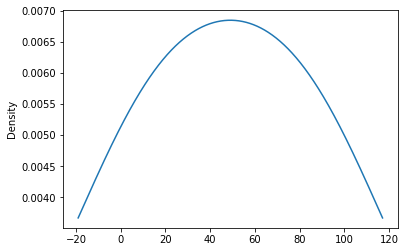

In [12]:
# Visualize the total_votes value counts
###Change once appropriate column is chosen
total_votes.plot.density()

In [13]:
# Generate our categorical variable list
votes_cat = votes_df.dtypes[votes_df.dtypes == "object"].index.tolist()


# Check the number of unique values in each column
votes_df[votes_cat].nunique()

county           98
state             2
winning_party     2
dtype: int64

In [14]:
#Create numeric and categorical values
numeric_columns = ['blue_votes', 'red_votes', 'other_votes', 'total_votes', 'election_year',
                   'PopPct_Urban', 'Unemployment','PopDen_Urban', 'PopPct_Rural',
                   'PopDen_Rural']

category_columns = ['county', 'state','winning_party']

In [15]:
votes_df.dropna(inplace=True)

In [16]:
#Create X value
X = votes_df[numeric_columns].merge(pd.get_dummies(votes_df[category_columns]), left_index=True, right_index=True)
X

,blue_votes,red_votes,other_votes,total_votes,election_year,PopPct_Urban,Unemployment,PopDen_Urban,PopPct_Rural,PopDen_Rural,...,county_Van Buren,county_Washtenaw,county_Wayne,county_Wexford,county_Yavapai,county_Yuma,state_AZ,state_MI,winning_party_democrat,winning_party_republican
0,13025,5947,484,19456,2000,25.94,9.0,1080.7,74.06,4.7,...,0,0,0,0,0,0,1,0,1,0
1,13360,18180,1701,33241,2000,63.70,4.5,1933.4,36.30,7.8,...,0,0,0,0,0,0,1,0,0,1
2,20280,17562,3041,40883,2000,68.53,4.4,1939.8,31.47,2.3,...,0,0,0,0,0,0,1,0,1,0
3,7700,9158,878,17736,2000,58.94,5.2,1625.0,41.06,4.6,...,0,0,0,0,0,0,1,0,0,1
4,3355,6007,302,9664,2000,53.56,5.4,1430.2,46.44,3.8,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,10845,13213,594,24652,2000,15.84,4.7,1333.3,84.16,58.9,...,0,0,0,0,0,0,0,1,0,1
94,13796,14792,894,29482,2000,29.14,4.1,1030.5,70.86,92.2,...,1,0,0,0,0,0,0,1,0,1
95,86647,52459,5834,144940,2000,83.55,2.4,2131.4,16.45,99.3,...,0,1,0,0,0,0,0,1,1,0
96,530414,223021,15192,768627,2000,99.30,3.9,3301.7,0.70,196.3,...,0,0,1,0,0,0,0,1,1,0


In [17]:
# creating instance of labelencoder
###le = LabelEncoder()
# Assigning numerical values and storing in another column

###votes_encoded_df = votes_df.apply(le.fit_transform)
###votes_encoded_df

In [18]:
# Fit and transform the OneHotEncoder using the categorical variable list
#encode_df = pd.DataFrame(enc.fit_transform(nn_df[votes_mi_cat]))

# Add the encoded variable names to the DataFrame
#encode_df.columns = enc.get_feature_names(votes_mi_cat)
#encode_df.head()
###X = votes_encoded_df
###X.columns.to_list()
X = X.fillna(0)
y = votes_df['total_votes']
###X.isnull().sum().values.any()

In [19]:
# Create a y series from Transactions column
###y = X["total_votes"]

In [20]:
# Split X and y into training and testing sets
###X = X.drop("total_votes", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [21]:
# Create a StandardScaler or MinMax Scaler instance
###scaler = StandardScaler()
scaler = MinMaxScaler()

# Fit the StandardScaler
#X_scaler = scaler.fit(X_train)
scaler.fit(X_train)

# Scale the data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
# Define the model - deep neural net
nn_model = tf.keras.models.Sequential()

In [23]:
# What is the length of the X_train info
###len(X_train_scaled[0])

In [24]:
nn_model.add(tf.keras.layers.Dense(units=len(X.columns) * 2, activation = "relu", input_dim = len(X.columns)))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [25]:
nn_model.add(tf.keras.layers.Dense(units=1, activation="linear"))

In [26]:
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 201       
Total params: 20,401
Trainable params: 20,401
Non-trainable params: 0
_________________________________________________________________


In [27]:
nn_model.compile(loss="mean_squared_error", optimizer="adam")

In [28]:
nn_model.fit(X_train_scaled, np.asarray(y_train), epochs=100)

Epoch 1/100
64/64 [==============================] - 0s 5ms/sample - loss: 32004126976.0000
Epoch 2/100
64/64 [==============================] - 0s 109us/sample - loss: 32004099072.0000
Epoch 3/100
64/64 [==============================] - 0s 109us/sample - loss: 32004079104.0000
Epoch 4/100
64/64 [==============================] - 0s 109us/sample - loss: 32004059136.0000
Epoch 5/100
64/64 [==============================] - 0s 94us/sample - loss: 32004044352.0000
Epoch 6/100
64/64 [==============================] - 0s 171us/sample - loss: 32004016128.0000
Epoch 7/100
64/64 [==============================] - 0s 140us/sample - loss: 32004000768.0000
Epoch 8/100
64/64 [==============================] - 0s 125us/sample - loss: 32003976192.0000
Epoch 9/100
64/64 [==============================] - 0s 94us/sample - loss: 32003950592.0000
Epoch 10/100
64/64 [==============================] - 0s 116us/sample - loss: 32003932160.0000
Epoch 11/100
64/64 [==============================] - 0s 109us/

64/64 [==============================] - 0s 125us/sample - loss: 31995398144.0000
Epoch 88/100
64/64 [==============================] - 0s 109us/sample - loss: 31995160448.0000
Epoch 89/100
64/64 [==============================] - 0s 125us/sample - loss: 31994988544.0000
Epoch 90/100
64/64 [==============================] - 0s 109us/sample - loss: 31994757120.0000
Epoch 91/100
64/64 [==============================] - 0s 125us/sample - loss: 31994530304.0000
Epoch 92/100
64/64 [==============================] - 0s 94us/sample - loss: 31994319872.0000
Epoch 93/100
64/64 [==============================] - 0s 125us/sample - loss: 31994109952.0000
Epoch 94/100
64/64 [==============================] - 0s 109us/sample - loss: 31993902592.0000
Epoch 95/100
64/64 [==============================] - 0s 94us/sample - loss: 31993655296.0000
Epoch 96/100
64/64 [==============================] - 0s 171us/sample - loss: 31993391104.0000
Epoch 97/100
64/64 [==============================] - 0s 172us/sa

In [29]:
y_train_pred = nn_model.predict(X_train_scaled)
y_test_pred = nn_model.predict(X_test_scaled)

In [30]:
r2_score(y_train, y_train_pred)

-0.2111105706120795

In [31]:
r2_score(y_test, y_test_pred)

-0.45981961620046463

In [32]:
deep_model = tf.keras.models.Sequential()

In [33]:
deep_model.add(tf.keras.layers.Dense(units=len(X.columns) * 2, activation = "relu", input_dim = len(X.columns)))

In [34]:
deep_model.add(tf.keras.layers.Dense(units=len(X.columns) * 2, activation = "relu"))

In [35]:
deep_model.add(tf.keras.layers.Dense(units=1, activation="linear"))

In [36]:
deep_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 200)               20200     
_________________________________________________________________
dense_3 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 201       
Total params: 60,601
Trainable params: 60,601
Non-trainable params: 0
_________________________________________________________________


In [37]:
deep_model.compile(loss="mean_squared_error", optimizer="adam")

In [38]:
deep_model.fit(X_train_scaled, np.asarray(y_train), epochs=100)

Epoch 1/100
64/64 [==============================] - 0s 7ms/sample - loss: 32004088832.0000
Epoch 2/100
64/64 [==============================] - 0s 234us/sample - loss: 32004035584.0000
Epoch 3/100
64/64 [==============================] - 0s 171us/sample - loss: 32003985152.0000
Epoch 4/100
64/64 [==============================] - 0s 187us/sample - loss: 32003936256.0000
Epoch 5/100
64/64 [==============================] - 0s 140us/sample - loss: 32003879936.0000
Epoch 6/100
64/64 [==============================] - 0s 421us/sample - loss: 32003823552.0000
Epoch 7/100
64/64 [==============================] - 0s 249us/sample - loss: 32003742720.0000
Epoch 8/100
64/64 [==============================] - 0s 187us/sample - loss: 32003641856.0000
Epoch 9/100
64/64 [==============================] - 0s 171us/sample - loss: 32003540992.0000
Epoch 10/100
64/64 [==============================] - 0s 187us/sample - loss: 32003419136.0000
Epoch 11/100
64/64 [==============================] - 0s 171u

Epoch 87/100
64/64 [==============================] - 0s 156us/sample - loss: 31495144320.0000
Epoch 88/100
64/64 [==============================] - 0s 140us/sample - loss: 31476607488.0000
Epoch 89/100
64/64 [==============================] - 0s 156us/sample - loss: 31461144064.0000
Epoch 90/100
64/64 [==============================] - 0s 140us/sample - loss: 31437693952.0000
Epoch 91/100
64/64 [==============================] - 0s 171us/sample - loss: 31415558144.0000
Epoch 92/100
64/64 [==============================] - 0s 171us/sample - loss: 31392848896.0000
Epoch 93/100
64/64 [==============================] - 0s 234us/sample - loss: 31368487232.0000
Epoch 94/100
64/64 [==============================] - 0s 187us/sample - loss: 31350558720.0000
Epoch 95/100
64/64 [==============================] - 0s 140us/sample - loss: 31328905984.0000
Epoch 96/100
64/64 [==============================] - 0s 156us/sample - loss: 31305236736.0000
Epoch 97/100
64/64 [==============================

In [39]:
y_train_pred = deep_model.predict(X_train_scaled)
y_test_pred = deep_model.predict(X_test_scaled)

In [40]:
r2_score(y_train, y_train_pred)

-0.1804679001536318

In [41]:
r2_score(y_test, y_test_pred)

-0.3762422595187309

In [42]:
# First hidden layer
###number_input_features = len(X_train_scaled[0])
###hidden_nodes_layer1 =  8
###hidden_nodes_layer2 = 5

###nn.add(
    ###tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
    ###)

In [43]:
# Second hidden layer
###nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

In [44]:
# Output layer
###nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [45]:
# Check the structure of the model
###nn.summary()

In [46]:
# Compile the model using the "adam" optimizer and "mean_squared_error" or "mean_absolute_error" loss function
#nn.compile(loss="mean_absolute_error", optimizer="adam", metrics=["accuracy"])
###nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["accuracy"])

In [47]:
# Train the model for 100 epochs.
###fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

In [48]:
# Show model info summary
###model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
###print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

In [49]:
# Predict values for the train and test sets
###y_pred = nn.predict(X_test_scaled)
###y_pred_train = nn.predict(X_train_scaled)
###y_pred_train

In [50]:
# Score the training predictions with r2_score()
###r2_score(y_train, y_pred_train)